# Regressão Linear

A regressão linear consiste em tentar explicar o comportamento de uma variável, dita *dependente*, a partir de uma ou mais variáveis, ditas *independentes*, com um modelo linear.



## 1. Regressão Linear Simples

A regressão linear simples trata de apenas uma variável independente.

seja $Y = \left\{y_1, y_2, \ldots, y_n\right\}$ uma amostra do conjunto de variáveis independentes e $X = \left\{x_1, x_2, \ldots, x_n\right\}$

O modelo linear para o comportamento destas variáveis é dado pela equação:

\begin{equation}
y_i = w_0 + w_1 x_i + \epsilon_i
\end{equation}

Onde $w_0, w_1$ são *parâmetros* do modelo e $\epsilon_i$ são *resíduos* (a diferença entre o modelo real e os dados realmente observados).

A hipótese do modelo linear é a de que os resíduos são variáveis aleatórias *independentes* distribuídas de acordo com uma distribuição *Gaussiana* de valor esperado *nulo*.

Isso equivale a supor que as variáveis independentes são resultado da reta $y = w_0 + w_1 x$ sobreposta a um ruído Gaussiano.

Adicionando-se a hipótese de que os ruídos Gaussianos são todos com a mesma covariância, os parâmetros da reta de *máxima verissimilhança* são dados por:

\begin{equation}
\underset{w_0, w_1}{\mbox{arg min}} \sum_i \epsilon_i^2= \sum_i \left(y_i - w_0 - w_1 x_i\right)^2
\end{equation}

Definindo-se:

\begin{align}
\bar{x} &= \frac{1}{n}\sum_i x_i \\
\bar{y} &= \frac{1}{n}\sum_i y_i \\
s_{xx} &= \sum_i (x_i - \bar{x})^2 \\
s_{yy} &= \sum_i (y_i - \bar{y})^2 \\
s_{xy} &= \sum_i (x_i - \bar{x})(y_i - \bar{y})
\end{align}

Então tem-se:

\begin{align}
w_1 &= \frac{s_{xy}}{s_{xx}}\\
w_0 &= \bar{y} - w_1 \bar{x}
\end{align} 

E finalmente, a soma total dos quadrados dos resíduos é dada por:

\begin{equation}
\sum_i \epsilon_i^2=s_{yy}\left(1-\frac{{s_{xy}}^2}{s_{xx} s_{yy}}\right)
\end{equation}

O valor 

\begin{equation}
\frac{s_{xy}}{\sqrt{s_{xx} s_{yy}}}
\end{equation}

é chamado de *coeficiente de correlação de Pearson*. Este é um valor que varia de -1 a 1 e mede o quão bem a variável dependente pode ser explicada por um modelo linear da variável dependente. 
Valores mais próximos de zero significam um modelo linear menos explicativo.
Valores mais próximos de 1 ou -1 significam um modelo linar mais explicativo.



### Exercício 1.1:

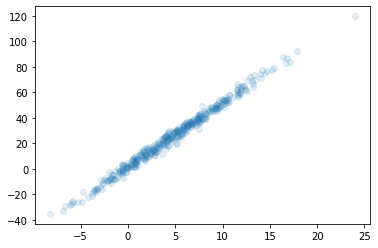

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(5, 5, 400)
y = 5*x + 2 + np.random.normal(0, 2.5, 400)
plt.scatter(x=x, y=y,alpha=0.125)
plt.show()

A variável ```y``` é gerada artificialmente a partir de um modelo linear $y = 5x +2$ sobreposto a um ruído gaussiano.

Determine:

  a) Os valores de $\bar{x}$, $\bar{y}$

c) Os valores de  $w_0$ e $w_1$ no modelo $y_i = w_0 + w_1 x_i + \epsilon_i$ de máxima verissimilhança.

d) Repita a plotagem *scatter* do enunciado sobreposta à reta $y=w_0 + w_1 x$

e) Calcule o resíduo quadrático total $\sum_i \epsilon_i^2$

f) Calcule o coeficiente de correlação de Pearson
\begin{equation}
r = \frac{s_{xy}}{\sqrt{s_{xx} s_{yy}}}
\end{equation}

Compare o valor $s_{yy}(1-r^2)$ com o obtido no item 3).

### Exercício 1.2

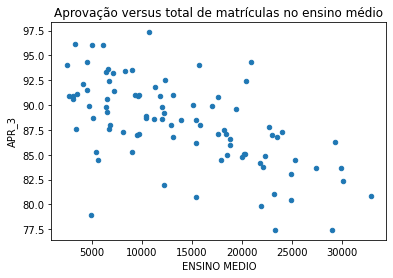

In [0]:
import urllib.request as request
import io
import pandas as pd
from IPython.core.display import HTML
aprovacao_2017=pd.read_csv(io.TextIOWrapper(request.urlopen("https://dados.educacao.sp.gov.br/sites/default/files/Fluxo_Escolar_por_DE_2017%20%284%29.csv")
, "utf-8-sig"))
alunos_matriculados=pd.read_csv(io.TextIOWrapper(request.urlopen("https://dados.educacao.sp.gov.br/sites/default/files/VW_ALUNOS_POR_ESCOLA_20190517_0.csv")), header=None, delimiter=";").loc[:,0:24]
alunos_matriculados.columns=["CD_DIRETORIA", "DE", "CODMUN", "MUN", "CATEG", "COD_ESC", "TIPOESC", "CODVINC", "NOMESC", "ENDESC", "NUMESC", "BAIESC", "EMAIL", "FONE1", "ZONA", "ED_INFANTIL", "CLASSES ESPECIAIS", "SALA DE RECURSO", "ANOS INICIAIS", "ANOS FINAIS", "ENSINO MEDIO", "EJA FUNDAMENTAL_AI", "EJA ENSINO MÉDIO", "EJA FUNDAMENTAL_AF", "EJA FUNDAMENTAL_MULTI"]
total_alunos_ensino_medio_por_diretoria = alunos_matriculados.groupby("CD_DIRETORIA").sum()["ENSINO MEDIO"]
aprovacao_e_matriculas=pd.merge(aprovacao_2017, total_alunos_ensino_medio_por_diretoria, left_on = "CD_DIRETORIA", right_index=True)[["ENSINO MEDIO", "APR_3"]]
aprovacao_e_matriculas.plot.scatter(x="ENSINO MEDIO", y="APR_3", title="Aprovação versus total de matrículas no ensino médio")
plt.show()

A base de dados ```aprovacao_e_matriculas``` é derivada da nossa velha conhecida base da Secretaria Estadual de Educação.

A coluna ```ENSINO MEDIO``` contẽm o total de alunos matriculados no ensino médio por diretoria. 

A coluna ```APR_3``` contẽm a taxa de aprovação no ensino médio.

Deseja-se investigar uma possível relação linear entre estas variáveis.

Para tanto determine:

a) Os coeficientes $w_0$ e $w_1$ de um modelo linear de aprovação em função do total de alunos matriculados.

b) O coeficiente de correlação de Pearson $r$ e seu valor ao quadrado $r^2$

c) O gráfico do enunciado sobreposto à reta determinada no item a).

## 2. Regressão multi-Linear

A regressão multi-linear trata da relação de uma variável dependente com *múltiplas* variáveis independentes.


seja 

\begin{equation}
Y = \begin{bmatrix}y_1\\
y_2\\
\vdots\\
y_n\end{bmatrix}
\end{equation}

 um vetor com uma amostra do conjunto de variáveis independentes e 

\begin{equation}
X = \begin{bmatrix}x_{1,1} & x_{1,2} & \ldots & x_{1,m} & 1\\
x_{2,1} & x_{2,2} & \ldots & x_{2,m} & 1\\
 \vdots & \vdots & \ddots & \vdots & \vdots\\
x_{n,1} & x_{n,2} & \ldots & x_{n,m} & 1\end{bmatrix}
\end{equation}

uma matriz $n \times (m+1)$ cujas primeiras $m$ colunas são compostas por uma amostra de cada uma das $m$ variáveis independetes e a sua *última* coluna é composta da constante 1.

O modelo linear para o comportamento destas variáveis é dado pela equação:

\begin{equation}
Y =  X W + E
\end{equation}

Onde:

\begin{equation}
W = \begin{bmatrix}w_1\\
w_2\\
\vdots\\
w_m\\
w_0
\end{bmatrix}
\end{equation}

é o vetor  de $(m+1)$ componentes dos coeficientes de cada uma das variáveis 
independentes. 
Note que nesta notação o coeficiente $w_0$ é o *último* coeficiente (há notações distintas nas quais ele é o primeiro).

$E$ é o vetor de *resíduos* (a diferença entre o modelo real e os dados realmente observados).

Seguindo a mesma hipótese de que os resíduos são variáveis aleatórias *independentes* distribuídas de acordo com uma distribuição *Gaussiana* de valor esperado *nulo*, o vetor $W$ de *máxima verissimilhança* é dado por:

\begin{equation}
\underset{W}{\mbox{arg min}}  \|E\|^2= \|Y-XW\|^2
\end{equation}

Se $W^*$ é ótimo deste problema, então vale

\begin{equation}
\left(X^T X\right)W^*=X^TY
\end{equation}

A solução deste sistema linear pode ser escrita como:
\begin{equation}
W^*=\left(X^T X\right)^{-1}X^TY
\end{equation}

e a matriz $\left(X^T X\right)^{-1}X$ é dita a *pseudo-inversa* de $X$.

*Nota*: Em geral não é eficiente calcular explicitamente esta matriz.

### Exercício 2.1

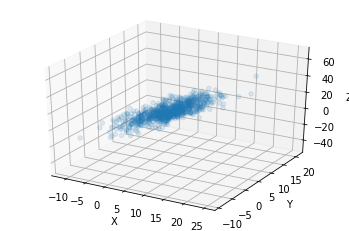

In [0]:
x = np.random.normal(5, 5, 800)
y = np.random.normal(5, 5, 800)
z = 3*x + -2* y + 5 + np.random.normal(0,1,800)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, alpha=0.125)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

A variável ```z``` acima é gerada através de um modelo linear $3x - 2y + 5$ sobreposto a um ruído Gaussiano.

a) Calcule através do método acima os coeficientes $w_1, w_2, w_0$ do modelo $z=w_1 x + w_2 y + w_0$ que melhor ajusta o cojunto de pontos das variáveis ```x```, ```y``` e ```z```.

*Nota*: Use a função ```np.linalg.solve(a, b)``` para resolver o sistema $ax=b$.

b) Repita a plotagem 3d do enunciado adicionando o plano que descreve a solução do item a).

*Sugestão*

Se as variáveis ```w_0```, ```w_1``` e ```w_2``` contém respectivamente os valores dos parâmetros $w_0$, $w_0$ e $w_2$, então o código abaixo adiciona o plano solicitado:

```
XX, YY = np.meshgrid(np.linspace(min(x),max(x),2),np.linspace(min(y),max(y),2))
ZZ = w0 + w1*XX + w2*YY
ax.plot_surface(XX, YY, ZZ, color='r', alpha=0.5)
```

### Exercício 2.2



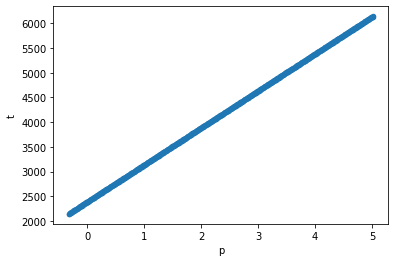

In [0]:
dados_encoder=pd.read_csv(io.TextIOWrapper(request.urlopen("https://www.lsc.poli.usp.br/255.csv"), "utf-8-sig"))
dados_encoder.columns=["t", "p"]
dados_encoder.plot.scatter(x="p", y="t")
plt.show()

O servomecanismo de acionamento do respirador da Poli-USP é implementado com um motor de CC e um *encoder* óptico.

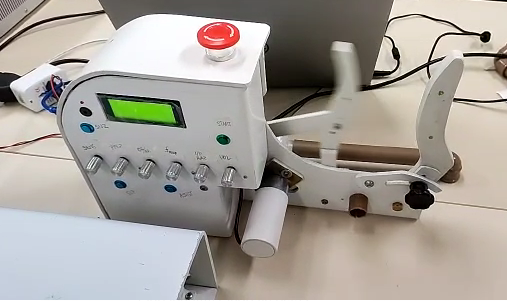


Respirador da Poli-USP.



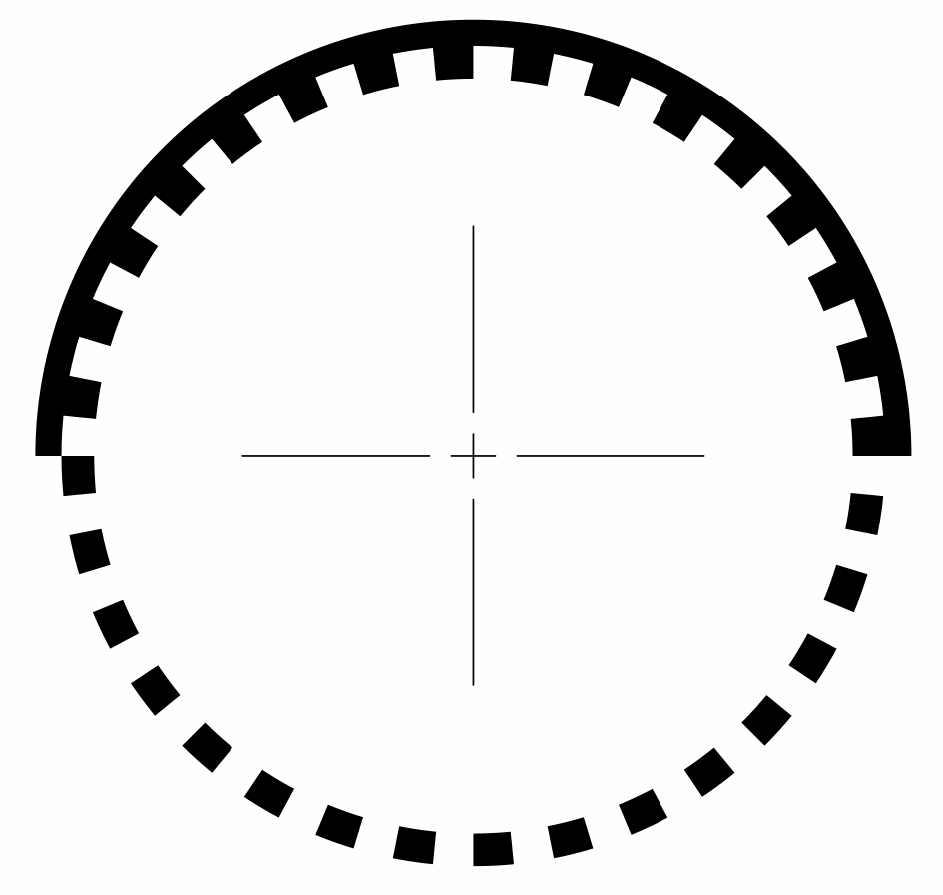

Encoder do Respirador Poli-USP

Para simplificar a construção, prevê-se montar o dispositivo com componentes de baixa precisão e aplicar um processo de *calibragem* ao dispositivo uma vez montado.

Fontes de erros comuns são: 

- Variações no ganho de rotação no motor.
- Erros de alinhamento no encoder.
- Erros de distorção no encoder.
- Erros de alinhamento nos sensores do encoder.

A base de dados ```dados_encoder``` foi coletada com o motor rodando a velocidade *constante*.
A coluna ```t``` registra em milissegundos o momento em que cada pulso do encoder é registrado.
A coluna ```p``` registra a posição medida no encoder em que o pulso foi registrado medida em *frações de revolução*.

Em uma rotação constante, tem-se:

\begin{equation}
t = t_0 + \frac{\theta}{\omega} 
\end{equation}

com $t$ sendo o tempo, $\theta$ a posição e $t_0$ o momento em que o encoder cruza a posição 0.

Devido a distorções e desalinhamentos no encoder e nos sensores, um modelo mais preciso é:

\begin{equation}
t = t_0 + \frac{\theta}{\omega} + s_1 \sin \theta + c_1 \cos \theta + s_2 \sin 2\theta + c_2 \cos 2\theta + s_{64} \sin 64\theta + c_{64} \cos 64\theta
\end{equation}

Os termos em $\sin \theta$ e $\cos \theta$ são relacionados ao *alinhamento* do encoder, os termos em $\sin 2\theta$ e $\cos 2\theta$ são relacionados a *distorções* no mesmo e os termos em $\sin 64\theta$ e $\cos 64\theta$ são relacionados ao alinhamento dos sensores.

Determine por regressão linear os coeficientes $t_0$, $1/\omega$, $s_1, c_1, s_2$, $c_2, s_{64}$ e $c_{64}$.

*Atenção*: A posição na coluna ```p``` é medida em frações de volta.
As funções ```np.sin``` e ```np.cos``` usam ângulos em radianos. 
Multiplique a posição por $2\pi$ para obter a posição em radianos.

Qual a rotação do encoder?
Qual a maior fonte de erros?